In [1]:
import datetime
import time as time_module
import sys
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import theano
import matplotlib
import pymc3 as pm

try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    sys.path.append('../..')
    import covid19_inference as cov19

path_to_save = '../../figures/'


In [11]:

confirmed_cases = cov19.get_jhu_confirmed_cases()

country = 'Germany'
date_data_begin = datetime.datetime(2020,3,1)
date_data_end = datetime.datetime(2020,3,31)
#date_data_end   = cov19.get_last_date(confirmed_cases)

#date_data_end   = datetime.datetime(2020,3,28)
num_days_data = (date_data_end-date_data_begin).days
diff_data_sim = 16 # should be significantly larger than the expected delay, in 
                   # order to always fit the same number of data points.
num_days_future = 28
date_begin_sim = date_data_begin - datetime.timedelta(days = diff_data_sim)
date_end_sim   = date_data_end   + datetime.timedelta(days = num_days_future)
num_days_sim = (date_end_sim-date_begin_sim).days


cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

print('Cases yesterday ({}): {} and '
      'day before yesterday: {}'.format(date_data_end.isoformat(), *cases_obs[:-3:-1]))

prior_date_mild_dist_begin =  datetime.datetime(2020,3,9)
prior_date_strong_dist_begin =  datetime.datetime(2020,3,16)
prior_date_contact_ban_begin =  datetime.datetime(2020,3,23)

change_points = [dict(pr_mean_date_begin_transient = prior_date_mild_dist_begin,
                      pr_sigma_date_begin_transient = 3,
                      pr_median_lambda = 0.2,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_strong_dist_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8,
                      pr_sigma_lambda = 0.2),
                 dict(pr_mean_date_begin_transient = prior_date_contact_ban_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8/2,
                      pr_sigma_lambda = 0.2)]

traces = []
models = []
for num_change_points in range(4):
    model = cov19.SIR_with_change_points(new_cases_obs = np.diff(cases_obs),
                                        change_points_list = change_points[:num_change_points],
                                        date_begin_simulation = date_begin_sim,
                                        num_days_sim = num_days_sim,
                                        diff_data_sim = diff_data_sim,
                                        N = 83e6,
                                        priors_dict=None)
    models.append(model)

    traces.append(pm.sample(model=model, init='advi', draws=1000))

Cases yesterday (2020-03-31T00:00:00): 71808 and day before yesterday: 66885
pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 281.18:   6%|▌         | 11827/200000 [00:16<04:18, 727.09it/s]
Convergence achieved at 11900
Interrupted at 11,899 [5%]: Average Loss = 368.49
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [01:20<00:00, 74.87draws/s]
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 0 was set to default value 3
pr_sigma_transient_len of change point 0 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 278.88:   7%|▋         | 13031/200000 [00:18<04:23, 708.90it/s]
Convergence achieved at 13100
Interrupted at 13,099 [6%]: Average Loss = 353.13
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_0, transient_begin_0, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [02:36<00:00, 38.33draws/s]
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 1 was set to default value 3
pr_sigma_transient_len of change point 1 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 275.67:   7%|▋         | 13951/200000 [00:19<04:22, 708.98it/s]
Convergence achieved at 14000
Interrupted at 13,999 [6%]: Average Loss = 347.91
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_1, transient_len_0, transient_begin_1, transient_begin_0, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [03:08<00:00, 31.77draws/s]


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 2 was set to default value 3
pr_sigma_transient_len of change point 2 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 274.17:   7%|▋         | 14497/200000 [00:20<04:27, 692.38it/s]
Convergence achieved at 14500
Interrupted at 14,499 [7%]: Average Loss = 347
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_2, transient_len_1, transient_len_0, transient_begin_2, transient_begin_1, transient_begin_0, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [03:18<00:00, 30.21draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [12]:
date_data_end_to_plot   = cov19.get_last_date(confirmed_cases)


cases_obs_to_plot = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end_to_plot)

Plots with data from 2020-03-01 to 2020-03-31
[737486. 737496.]


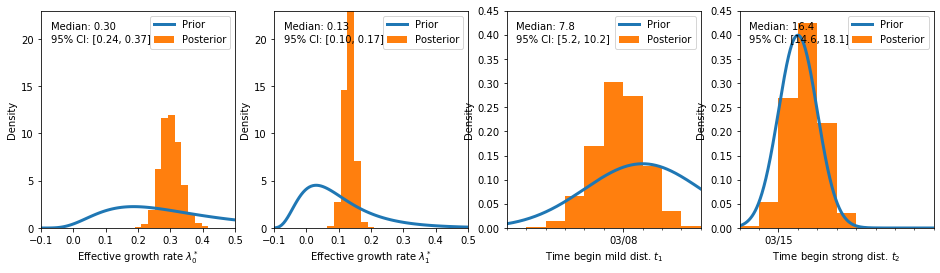

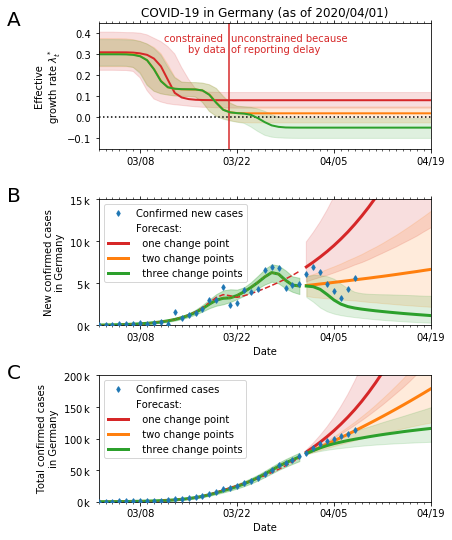

In [13]:
def truncate_number(number, precision):
    return '{{:.{}f}}'.format(precision).format(number)  

def print_median_CI(arr, prec = 2):
    f_trunc = lambda n: truncate_number(n, prec)
    med = f_trunc(np.median(arr))
    perc1, perc2 = f_trunc(np.percentile(arr, q=2.5)), f_trunc(np.percentile(arr, q=97.5))
    return 'Median: {}\n95% CI: [{}, {}]'.format(med, perc1, perc2)
def conv_time_to_mpl_dates(arr):
    return matplotlib.dates.date2num([datetime.timedelta(days=float(date)) + date_begin_sim for date in arr])

print("Plots with data from {} to {}".format(date_data_begin.date().isoformat(), date_data_end.date().isoformat()))

trace = traces[3]
posterior = traces[1:]

fig, axes = plt.subplots(1,4, figsize=(16, 4))
#plt.locator_params(nbins=4)
pos_letter = (-0.2, 1)


limit_lambda = (-0.1,0.5)
bins_lambda  = np.linspace(*limit_lambda, 30)


ax = axes[0]
ax.hist(trace.lambda_0 - trace.mu, bins=bins_lambda, density=True, color='tab:orange',
        label='Posterior')
limits = ax.get_xlim()
x = np.linspace(*limit_lambda, num=100)
ax.plot(x, scipy.stats.lognorm.pdf(x+1/8, scale=0.4, s=0.5), label='Prior',
        color='tab:blue', linewidth=3)
ax.set_xlim(*limit_lambda)
ax.set_ylabel('Density')
ax.set_xlabel('Effective growth rate $\lambda_0^*$')
text = print_median_CI(trace.lambda_0 - trace.mu, prec=2)
ax.text(0.05, 0.95, text, horizontalalignment='left',
      verticalalignment='top', transform=ax.transAxes)
ax.legend(loc='upper right')
ax.set_ylim(0,23)


ax = axes[1]
ax.hist(trace.lambda_1 - trace.mu, bins=bins_lambda, density=True, color='tab:orange',
        label='Posterior')
limits = ax.get_xlim()
x = np.linspace(*limit_lambda, num=100)
ax.plot(x, scipy.stats.lognorm.pdf(x+1/8, scale=0.2, s=0.5), label='Prior',
        color='tab:blue', linewidth=3)
ax.set_xlim(*limit_lambda)
ax.set_ylabel('Density')
ax.set_xlabel('Effective growth rate $\lambda_1^*$')
text = print_median_CI(trace.lambda_1 - trace.mu, prec=2)
ax.text(0.05, 0.95, text, horizontalalignment='left',
      verticalalignment='top', transform=ax.transAxes)
ax.legend(loc='upper right')
ax.set_ylim(0,23)



diff_to_0 = num_days_data + diff_data_sim 


dates_mild = conv_time_to_mpl_dates(trace.transient_begin_0)

ax = axes[2]
limits = matplotlib.dates.date2num([datetime.date(2020,3,2), datetime.date(2020,3,12)])
bins = np.arange(limits[0], limits[1]+1)
ax.hist(dates_mild, bins=bins, density=True, color='tab:orange',
        label='Posterior')
#limits = ax.get_xlim()
x = np.linspace(*limits, num=1000)
ax.plot(x, scipy.stats.norm.pdf(x, loc=matplotlib.dates.date2num([prior_date_mild_dist_begin])[0], scale=3), 
        label='Prior',color='tab:blue', linewidth=3)
ax.set_xlim(limits[0], limits[1])
ax.set_ylabel('Density')
ax.set_xlabel('Time begin mild dist. $t_1$')
text = print_median_CI(dates_mild - matplotlib.dates.date2num(datetime.datetime(2020,3,1))+1, prec=1)
ax.text(0.05, 0.95, text, horizontalalignment='left',
      verticalalignment='top', transform=ax.transAxes)
ax.legend(loc='upper right')
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(interval=2, byweekday=matplotlib.dates.SU))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d'))
ax.set_ylim(0,0.45)
print(limits)

ax = axes[3]
dates_strong = conv_time_to_mpl_dates(trace.transient_begin_1)
limits = matplotlib.dates.date2num([datetime.date(2020,3,13), datetime.date(2020,3,23)])
bins = np.arange(limits[0], limits[1]+1)
ax.hist(dates_strong, bins=bins, density=True, color='tab:orange',
        label='Posterior')
#limits = ax.get_xlim()
x = np.linspace(*limits, num=1000)
ax.plot(x, scipy.stats.norm.pdf(x, loc=matplotlib.dates.date2num([prior_date_strong_dist_begin])[0], scale=1), 
        label='Prior',color='tab:blue', linewidth=3)
ax.set_xlim(limits[0], limits[1])
ax.set_ylabel('Density')
ax.set_xlabel('Time begin strong dist. $t_2$')
text = print_median_CI(dates_strong - matplotlib.dates.date2num(datetime.datetime(2020,3,1))+1, prec=1)
ax.text(0.05, 0.95, text, horizontalalignment='left',
      verticalalignment='top', transform=ax.transAxes)
ax.legend(loc='upper right')
#ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(interval=2, byweekday=matplotlib.dates.SU))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d'))
ax.set_ylim(0,0.45)
ax.set_xlim(limits[0], limits[1])



# plt.savefig(path_to_save + 'summary_distributions.png', dpi=300)
# plt.savefig(path_to_save + 'summary_distributions.pdf', dpi=300)


fig, axes = plt.subplots(3,1, figsize=(6.5,7.5), gridspec_kw={'height_ratios': [2, 2,2]})

colors  = ['tab:red', 'tab:orange', 'tab:green']
legends = ['Forecast: ', '  one change point', '  two change points',  '  three change points']

ax = axes[1]

time1 = np.arange(-len(cases_obs)+2, 1)
mpl_dates = conv_time_to_mpl_dates(time1) + diff_data_sim + num_days_data
time_for_obs = np.arange(-len(cases_obs)+2, 1+len(cases_obs_to_plot)-len(cases_obs))
mpl_dates_for_obs = conv_time_to_mpl_dates(time_for_obs) + diff_data_sim + num_days_data

start_date = mpl_dates[0]
diff_cases =np.diff(cases_obs)
ax.plot(mpl_dates_for_obs, np.diff(cases_obs_to_plot), 'd', label='Confirmed new cases', 
        markersize=4, color='tab:blue', zorder=5)
#ax.plot(mpl_dates, diff_cases, 'd', markersize=4, color='tab:blue', 
#            zorder=6)

new_cases_past = trace.new_cases[:,:num_days_data]
percentiles = np.percentile(new_cases_past, q=2.5, axis=0), np.percentile(new_cases_past, q=97.5, axis=0)
ax.plot(mpl_dates, np.median(new_cases_past, axis=0),color='tab:green', linewidth=3, zorder=-1)
ax.fill_between(mpl_dates, percentiles[0], percentiles[1], alpha=0.3, color='tab:green')

ax.plot([],[], label=legends[0], alpha=0)
for trace_scen, color, legend in zip(posterior, colors, legends[1:]):
    new_cases_past = trace_scen.new_cases[:,:num_days_data]
    ax.plot(mpl_dates, np.median(new_cases_past, axis=0),'--',color=color, linewidth=1.5)

    time2 = np.arange(0, num_days_future+1)
    mpl_dates_fut = conv_time_to_mpl_dates(time2) + diff_data_sim + num_days_data
    end_date = mpl_dates_fut[-10]
    cases_future = trace_scen['new_cases'][:, num_days_data:].T
    #cases_future = np.concatenate([np.ones((1,cases_future.shape[1]))*diff_cases[-1], cases_future], axis=0)
    median = np.median(cases_future, axis=-1)
    percentiles = (
    np.percentile(cases_future, q=2.5, axis=-1),
    np.percentile(cases_future, q=97.5, axis=-1),
    )

    ax.plot(mpl_dates_fut[1:], median, color=color, linewidth=3, label=legend)
    ax.fill_between(mpl_dates_fut[1:], percentiles[0], percentiles[1], alpha=0.15, color=color)
    #ax.fill_between(mpl_dates, np.percentile(cases_future, q=12.5, axis=-1), np.percentile(cases_future, q=87.5, axis=-1),
    #            alpha=0.2, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('New confirmed cases\nin Germany')
ax.legend(loc='upper left')
ax.set_ylim(0, 15_000)
# ax.legend(loc='lower left')
#ax.set_xticks([-28,-21, -14, -7, 0, 7, 14, 21, 28])s
#ax.set_xlim(-28, 14)
ax.locator_params(axis="y", nbins=4)
func_format = lambda num, _: "${:.0f}\,$k".format(num/1_000)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(func_format))
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(interval=2, byweekday=matplotlib.dates.SU))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d'))
ax.set_xlim(start_date, end_date)
ax.text(-0.275, 0.98, "B", transform=ax.transAxes, size=20)
ax.xaxis.set_ticks_position('both')


ax=axes[2]

time1 = np.arange(-len(cases_obs)+2, 1)
mpl_dates = conv_time_to_mpl_dates(time1) + diff_data_sim + num_days_data
ax.plot(mpl_dates_for_obs, cases_obs_to_plot[1:], 'd', label='Confirmed cases', markersize=4, color='tab:blue', 
            zorder=5)
#ax.plot(mpl_dates, cases_obs[1:], 'd', markersize=4, color='tab:blue', 
#            zorder=6)

cum_cases = np.cumsum(new_cases_past, axis=1) + cases_obs[0]
percentiles = np.percentile(cum_cases, q=2.5, axis=0), np.percentile(cum_cases, q=97.5, axis=0)
ax.plot(mpl_dates, np.median(cum_cases, axis=0),color='tab:green', linewidth=3, zorder=-1)
ax.fill_between(mpl_dates, percentiles[0], percentiles[1], alpha=0.3, color='tab:green')

ax.plot([],[], label=legends[0], alpha=0)
for trace_scen, color, legend in zip(posterior, colors, legends[1:]):
    new_cases_past = trace_scen.new_cases[:,:num_days_data]
    cum_cases = np.cumsum(new_cases_past, axis=1) + cases_obs[0]
    ax.plot(mpl_dates, np.median(cum_cases, axis=0),'--',color=color, linewidth=1.5)

    time2 = np.arange(0, num_days_future+1)
    mpl_dates_fut = conv_time_to_mpl_dates(time2) + diff_data_sim + num_days_data
    cases_future = np.cumsum(trace_scen['new_cases'][:, num_days_data:].T, axis=0) + cases_obs[-1]
    #cases_future = np.concatenate([np.ones((1,cases_future.shape[1]))*cases_obs[-1], cases_future], axis=0)
    median = np.median(cases_future, axis=-1)
    percentiles = (
        np.percentile(cases_future, q=2.5, axis=-1),
        np.percentile(cases_future, q=97.5, axis=-1),
    )
    ax.plot(mpl_dates_fut[1:], median, color=color, linewidth=3, label=legend)
    ax.fill_between(mpl_dates_fut[1:], percentiles[0], percentiles[1], alpha=0.15, color=color)
    #ax.fill_between(mpl_dates, np.percentile(cases_future, q=12.5, axis=-1), np.percentile(cases_future, q=87.5, axis=-1),
    #                alpha=0.2, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('Total confirmed cases\nin Germany')
ax.legend(loc='upper left')
ax.set_ylim(0, 200_000)
# ax.legend(loc='lower left')
#ax.set_xticks([-28,-21, -14, -7, 0, 7, 14, 21, 28])
#ax.set_xlim(-28, 14)
ax.locator_params(axis="y", nbins=4)
func_format = lambda num, _: "${:.0f}\,$k".format(num/1_000)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(func_format))
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(interval=2,byweekday=matplotlib.dates.SU))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d'))
ax.set_xlim(start_date, end_date)
ax.text(-0.275, 0.98, "C", transform=ax.transAxes, size=20)


ax = axes[0]

time = np.arange(-diff_to_0+1, -diff_to_0+num_days_sim+1)

for trace_scen, color in zip(posterior, colors):

    lambda_t = trace_scen['lambda_t'][:, :]
    mu = trace_scen['mu'][:,None]
    mpl_dates = conv_time_to_mpl_dates(time) + diff_data_sim + num_days_data

    ax.plot(mpl_dates, np.median(lambda_t-mu, axis=0), color=color, linewidth=2)
    ax.fill_between(mpl_dates, np.percentile(lambda_t-mu , q=2.5, axis=0),np.percentile(lambda_t-mu, q=97.5, axis=0), alpha=0.15,
                    color=color)
    #ax.fill_between(mpl_dates, np.percentile(lambda_t , q=12.5, axis=0),np.percentile(lambda_t, q=87.5, axis=0), alpha=0.2,
    #                color=color)

ax.set_ylabel('Effective\ngrowth rate $\lambda_t^*$')
# ax.set_xlabel("days from now")
# ax.legend(loc='lower left')
ax.set_xticks([-28, -21, -14, -7, 0, 7, 14, 21, 28])
#ax.set_xlim(-28, 14)
ax.set_ylim(-0.15, 0.45)
#ax.set_yticks([-0.2, 0, 0.2])
#ax.set_aspect(15, adjustable="box")
ax.hlines(0,start_date, end_date, linestyles=':')
delay = matplotlib.dates.date2num(date_data_end) - np.percentile(trace.delay, q=75)
ax.vlines(delay,-10, 10, linestyles='-', colors=['tab:red'])
#ax.legend()
ax.text(delay+0.4, 0.4, 'unconstrained because\nof reporting delay', color='tab:red', verticalalignment='top')
ax.text(delay-0.4, 0.4, 'constrained \nby data', color='tab:red',horizontalalignment='right', verticalalignment='top')
ax.text(-0.275, 0.98, "A", transform=ax.transAxes, size=20)
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(interval=2, byweekday=matplotlib.dates.SU))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d'))
ax.set_xlim(start_date, end_date)
ax.xaxis.set_ticks_position('both')

fig.subplots_adjust(hspace=-0.90)
plt.tight_layout()

plt.savefig(path_to_save + 'summary_forecast_april1.pdf', dpi=300)
axes[0].set_title('COVID-19 in Germany (as of {})'.format((date_data_end + datetime.timedelta(days=1)).strftime('%Y/%m/%d')))
plt.savefig(path_to_save + 'summary_forecast_april1.png', dpi=300)